# Objetivo General

Objetivo: Obtener datos y analizarlos en Python para contestar una pregunta de interés
para la industria de cafeterías, explorando cómo la frecuencia de visitas, calidad del servicio y percepción del precio
impactan en la satisfacción y lealtad del cliente de Starbucks.

# Abstracto con motivación y audiencia

Motivación: Starbucks busca optimizar la satisfacción del cliente y su fidelización mediante un análisis de sus encuestas
de satisfacción. La empresa quiere entender las relaciones entre factores como la frecuencia de visitas, calidad del servicio,
y percepción del precio, y cómo estos influyen en la satisfacción general del cliente.
Audiencia: Equipos de marketing, operaciones y dirección de Starbucks que buscan adaptar sus estrategias a las expectativas
de sus clientes y mejorar la experiencia en tienda.


# Preguntas/Hipótesis a responder

1. ¿Existe una relación entre la satisfacción general y la frecuencia de visitas?
2. ¿La calidad del servicio afecta la probabilidad de recomendación?
3. ¿El precio percibido afecta la percepción de calidad del café?

Dimensiones del dataset: (122, 21)

Tipos de datos en el dataset:
Timestamp                                                                                                                 object
1. Your Gender                                                                                                            object
2. Your Age                                                                                                               object
3. Are you currently....?                                                                                                 object
4. What is your annual income?                                                                                            object
5. How often do you visit Starbucks?                                                                                      object
6. How do you usually enjoy Starbucks?                                                                                    object
7. How much time do you normall

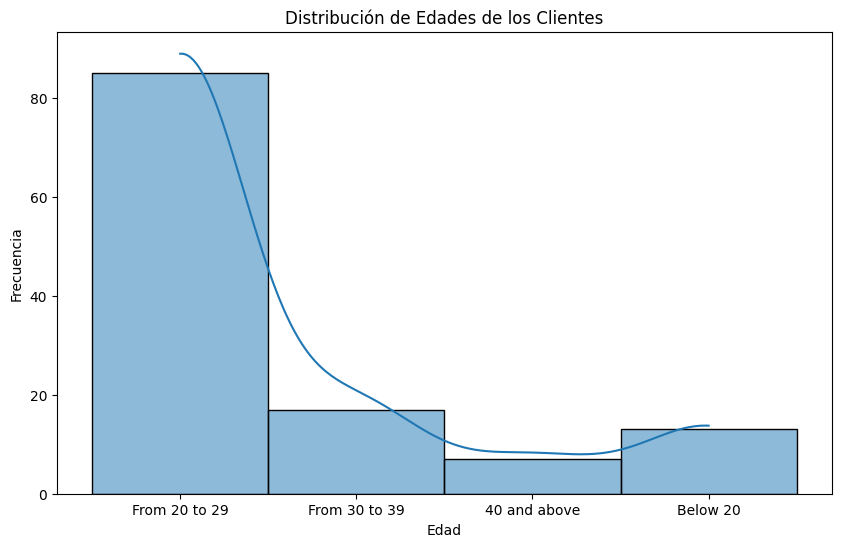

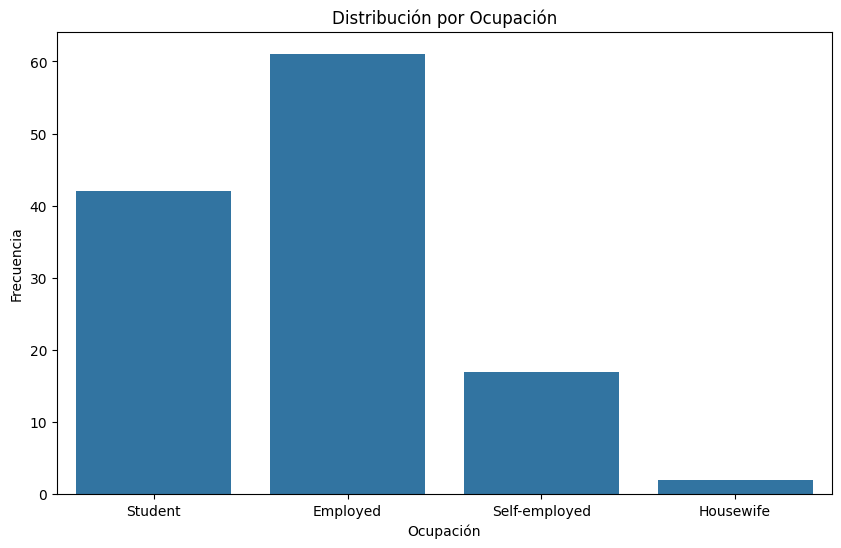


Valores nulos en el dataset:
Timestamp                                                                                                                 0
1. Your Gender                                                                                                            0
2. Your Age                                                                                                               0
3. Are you currently....?                                                                                                 0
4. What is your annual income?                                                                                            0
5. How often do you visit Starbucks?                                                                                      0
6. How do you usually enjoy Starbucks?                                                                                    1
7. How much time do you normally  spend during your visit?                                            

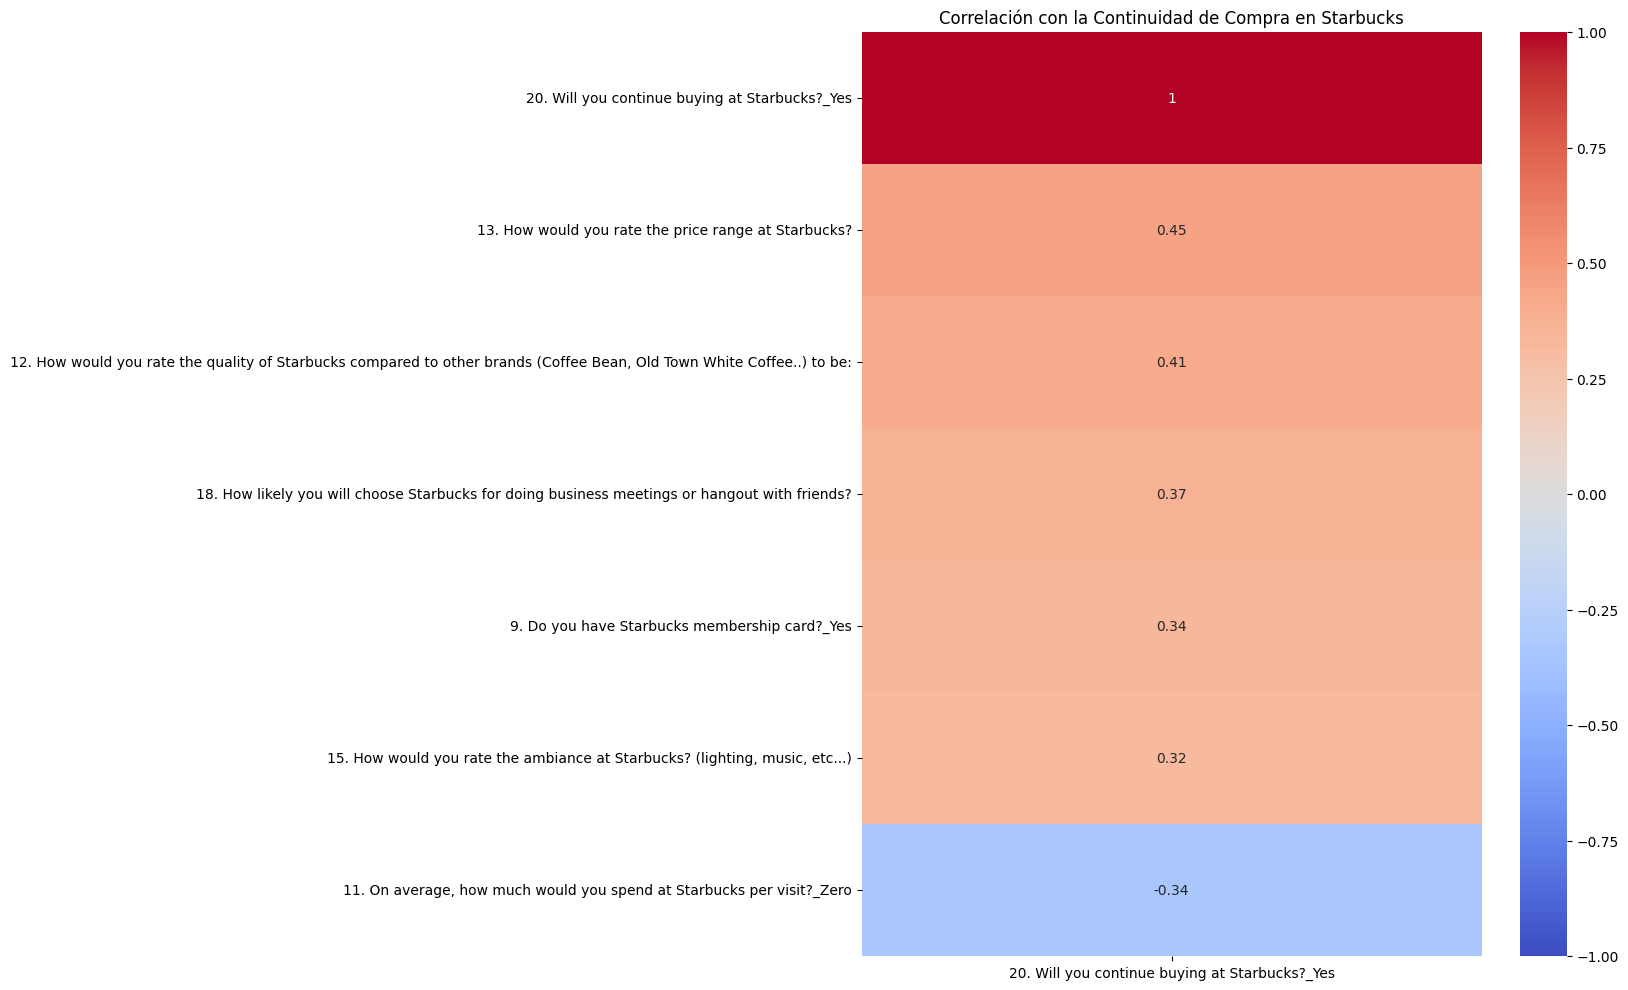

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests


# Importación de datos desde una API
url = 'https://raw.githubusercontent.com/Ro2709/Dataset_DSI/main/Starbucks%20satisfactory.csv'
data = pd.read_csv(url)

# Guardar en archivo CSV para demostración de guardado de datos crudos
data.to_csv("Starbucks_satisfactory.csv", index=False)

# Resumen de la metadata
print("Dimensiones del dataset:", data.shape)
print("\nTipos de datos en el dataset:")
print(data.dtypes)

# Análisis exploratorio de datos (EDA)
# Estadísticas descriptivas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(data.describe())

# Frecuencia de variables categóricas
print("\nFrecuencia de la variable de ocupación:")
print(data['3. Are you currently....?'].value_counts())

print("\nFrecuencia de la variable de frecuencia de visitas:")
print(data['5. How often do you visit Starbucks?'].value_counts())

# Visualización: Distribución de edades de los clientes
plt.figure(figsize=(10, 6))
sns.histplot(data['2. Your Age'], bins=30, kde=True)
plt.title('Distribución de Edades de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras: Distribución por ocupación
plt.figure(figsize=(10, 6))
sns.countplot(x='3. Are you currently....?', data=data)
plt.title('Distribución por Ocupación')
plt.xlabel('Ocupación')
plt.ylabel('Frecuencia')
plt.show()

# Identificación y tratamiento de valores nulos
print("\nValores nulos en el dataset:")
print(data.isnull().sum())

# Conversión de columna para análisis de outliers
data['6. How do you usually enjoy Starbucks?'] = pd.to_numeric(data['6. How do you usually enjoy Starbucks?'], errors='coerce')
Q1 = data['6. How do you usually enjoy Starbucks?'].quantile(0.25)
Q3 = data['6. How do you usually enjoy Starbucks?'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificación de outliers
outliers = data[(data['6. How do you usually enjoy Starbucks?'] < lower_bound) |
                (data['6. How do you usually enjoy Starbucks?'] > upper_bound)]
print("\nOutliers en '6. How do you usually enjoy Starbucks?':")
print(outliers)

# Categorización y codificación de datos
data_encoded = pd.get_dummies(data, drop_first=True)
print("\nVariables codificadas:")
print(data_encoded.columns)

# Análisis de correlación con la variable de continuidad de compra
response_column = [col for col in data_encoded.columns if '20. Will you continue buying at Starbucks?' in col]
if response_column:
    correlation_matrix = data_encoded.corr()
    response_correlation = correlation_matrix[response_column[0]].sort_values(ascending=False)
    print("\nCorrelaciones con 'Continuidad de Compra':")
    print(response_correlation)
else:
    print("No se encontró la columna de respuesta en las variables codificadas.")

# Mapa de calor de correlaciones significativas
significant_correlations = response_correlation[(response_correlation > 0.3) | (response_correlation < -0.3)]
plt.figure(figsize=(10, 12))
sns.heatmap(significant_correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación con la Continuidad de Compra en Starbucks')
plt.show()
